# Palette design

The palette is parametrized in the [Oklch color space](https://en.wikipedia.org/wiki/Oklab_color_space) by two lightness levels at which chroma is maximized. The primary colors shown below are generated using the default values of these parameters.

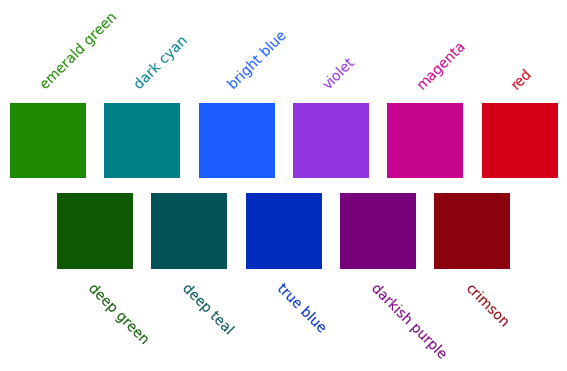

In [ ]:
from vakio import *
import vakio.view as view
palette = create_palette()
view.hexes(
    palette[metadata.DARK_COLORS], 
    palette[metadata.BRIGHT_COLORS]
)

Colors are labeled based on the closest [XKCD color](https://xkcd.com/color/rgb/).

## Color generation

__Dark colors__ have uniform lightness in the Oklch space. They are the cusp points at the boundary of the [sRGB space](https://en.wikipedia.org/wiki/SRGB), together with two interpolated points. One of the interpolated points is between blue and red, and the other is between green and blue. Colors can be tuned with the `shifts` parameter. __Bright colors__ are generated in the same manner but with greater uniform lightness and with two interpolated points between blue and red.

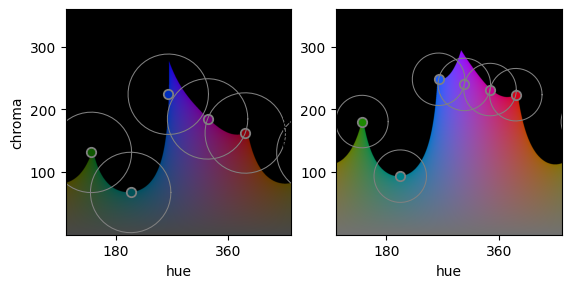

In [ ]:
import matplotlib.pyplot as plt
import vakio.plot as plot
from vakio.alg import generate

dark = generate(0.4, shifts=[-0.05 if i == 2 else 0 for i in range(5)])
bright = generate(0.55, n_magenta=2)
_, axs = plt.subplots(1, 2)
plt.sca(axs[0]); plot.colors(dark)
plt.sca(axs[1]); plot.colors(bright)

All circles have the same, radius given by the distance between the nearest pair of colors.

## Full palette

At low lightness levels, colors between red and green look brownish. These are not used in the palette. Instead two additional colors are added manually. Further, as the generated greens have lower chroma values than blues and reds, one green color with higher chroma is added. The default choices are shown below.

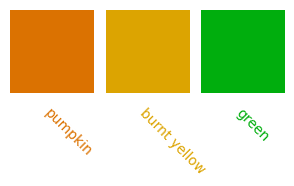

In [ ]:
view.hexes(palette[metadata.MANUAL_COLORS])

These extra colors enable, in particular, rendering of rainbow brackets. 

In [ ]:
view.cycle_colors(6 * '(', palette[metadata.RAINBOW])

Gray shades are generated based on `L_bright`, together with a fixed black shade and a fixed shade of light grey. In addition, two whitish shades are added manually. The default choices are Dark 5 (pure black), Light 3, Light 2 and Light 1 (pure white) from [Adwaita color palette](https://en.wikipedia.org/wiki/Adwaita_(design_language)#Color), shown below.

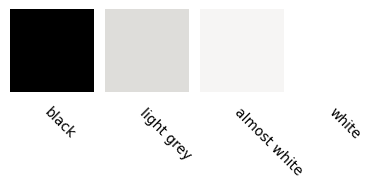

In [ ]:
view.hexes(palette[metadata.MANUAL_GREYS], colored_labels=False)

The full scale of greys is obtained via linear interpolation in lightness in the Oklch space, setting c and h to zero.
Two dark grey shades are interpolated between black and `L_bright` and five between `L_bright` and light grey.

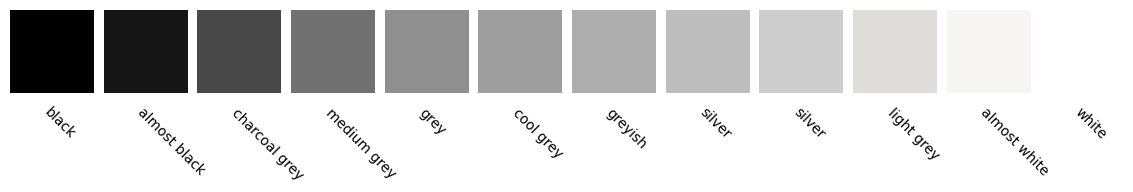

In [ ]:
view.hexes(palette[metadata.GREYS], colored_labels=False)

## Semantics

The palette is mapped to semantics close to those of [Catppuccin](https://github.com/catppuccin/catppuccin/blob/main/docs/style-guide.md), with the following differencies 

* Catppuccin semantic classes _Keywords_ and _Followed Links, Active Line Number_ are merged
* Certain colors are not mapped to Catppuccin palette (those without 🐱 below) 

In [ ]:
view.palette(palette, show_rainbow_name=False)

■,text,#000000 0 0 black,#️⃣0 (Black) 🐱Text
■,labels,#484848 40 0 charcoal grey,"🐱Sub-Headlines, Labels"
■,params,#0f5801 40 132 deep green,🐱Parameters
■,escapes,#025258 40 67 deep teal,"#️⃣6 (Cyan) 🐱Escape Sequences, Regex"
■,functions,#002dbd 40 224 true blue,"#️⃣4 (Blue) 🐱Methods, Functions, Properties, Links, URLs, Tags"
■,operators,#1b5dff 55 248 bright blue,"#️⃣12 (Bright Blue) 🌈4 🐱Operators, On Hover Links"
■,keywords,#76017a 40 185 darkish purple,"#️⃣5 (Magenta) 🐱Keywords, Followed Links, Active Line Number"
■,classes,#8b010c 40 163 crimson,"#️⃣1 (Red) 🐱Warnings, Classes, Interfaces, Annotations, Metadata, Enums, Types, Attributes"
■,subtle,#8f8f8f 65 0 grey,"#️⃣7 (White) 🐱Subtle, Line Numbers"
■,comments,#717171 55 0 medium grey,"#️⃣8 (Bright Black) 🐱Comments, Braces, Delimiters"
■,strings,#1d8902 55 180 emerald green,"#️⃣2 (Green) 🐱Success, Strings"


The columns are _semantic name_, hex value, lightness as percentage, chroma per mille, XKCD name, and description. The description consists of:

* mapping to the ANSI colors (terminals #️⃣)
* mapping to the colors of rainbow (rainbow brackets 🌈)
* mapping to Catppuccin semantic classes (syntax coloring 🐱)

### Notes on design choices

In syntax highlighting, darker colors are generally preferred over brighter ones. For example, in Python as rendered in VS Code, bright colors are used mostly for:

* operators such as `=`, `+`, `-`, etc.
* numbers
* strings 

The first two typically consist of only a few characters. While strings are often longer, their green color has relatively low chroma, causing them to visually recede in a way similar to comments. This effect works particularly well for Python docstrings.

The rationale for using dark green for parameters is to avoid large color variations among local variables.

Dark colors also avoid clashing with rainbow bracket coloring, whereas the bright colors used for operators and numbers can conflict with it. In practice, however, this issue does not arise until nesting level 5.


### UI colors

There are two sets of greys, those for text and those for UI elements.

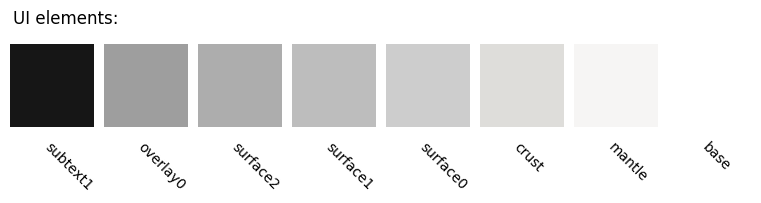

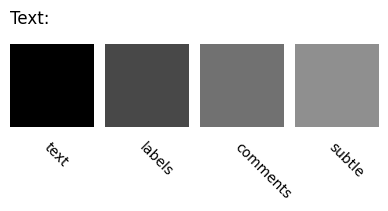

In [ ]:
view.indices(palette, metadata.UI_GREYS, title="UI elements:")
view.indices(palette, metadata.TEXT_GREYS, title="Text:")